In [1]:
import math
import tensorflow as tf2
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()
import numpy as np
import h5py
import matplotlib.pyplot as plt

np.random.seed(1)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('data/test_signs.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes

In [81]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    m = X.shape[1]
    mini_batches = []
    np.random.seed(seed)
    
    permutation = list(np.random.permutation(m))
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[:, permutation].reshape((Y.shape[0], m))
    
    num_complete_minibatches = math.floor(m / mini_batch_size)
    
    for k in range(num_complete_minibatches):
        mini_batch_X = X_shuffled[:, k * mini_batch_size : k*mini_batch_size + mini_batch_size]
        mini_batch_Y = Y_shuffled[:, k * mini_batch_size : k*mini_batch_size + mini_batch_size]        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = X_shuffled[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = Y_shuffled[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [49]:
def onehot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Exploring Tenorflow

$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [50]:
with tf1.Session() as sess:
    y_hat = tf1.constant(36, name="y_hat")
    y = tf1.constant(39, name="y")

    loss = tf1.Variable((y - y_hat)**2, name="loss")
    init = tf1.global_variables_initializer()
    sess.run(init)
    print(sess.run(loss))

9


In [51]:
with tf1.Session() as sess:
    a = tf1.constant(2)
    b = tf1.constant(10)
    c = tf1.multiply(a, b)
#     print(c)
    print(sess.run(c))

20


In [52]:
with tf1.Session() as sess:
    x = tf1.placeholder(tf1.int64, name="x")
    print(sess.run(2 * x, feed_dict = {x:3}))

6


## Linear Funtion

In [53]:
def linear_function():
    np.random.seed(1)
    
    with tf1.Session() as sess:
        X = tf1.constant(np.random.randn(3, 1), name="X")
        W = tf1.constant(np.random.randn(4, 3), name="W")
        b = tf1.constant(np.random.randn(4, 1), name="b")
        Y = tf1.matmul(W, X) + b
        
        result = sess.run(Y)
        return result

In [54]:
linear_function()

array([[-2.15657382],
       [ 2.95891446],
       [-1.08926781],
       [-0.84538042]])

## Sigmoid

In [55]:
def sigmoid(z):
    with tf1.Session() as sess:
        x = tf1.placeholder(tf1.float32, name="x")
        
        sigmoid = tf1.sigmoid(x)
        
        result = sess.run(sigmoid, feed_dict={x:z})
        return result

In [56]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$

In [57]:
def cost(logits, labels):
    with tf1.Session() as sess:
        z = tf1.placeholder(tf1.float32, name="z")
        y = tf1.placeholder(tf1.float32, name="y")

        cost = tf1.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
        cost = sess.run(cost, feed_dict={z:logits, y:labels})
        return cost

In [58]:
logits = np.array([0.2,0.4,0.7,0.9])

cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [0.79813886 0.91301525 0.40318602 0.3411539 ]


In [59]:
def onehot_matrix(labels, C):
    with tf1.Session() as sess:
        C = tf1.constant(C, name="C")
        onehot_matrix = tf1.transpose(tf1.one_hot(labels, C))
        onehot = sess.run(onehot_matrix)
        return onehot

In [60]:
labels = np.array([1,2,3,0,2,1])
one_hot = onehot_matrix(labels, C = 4)
print ("one_hot = \n" + str(one_hot))

one_hot = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [61]:
def ones(shape):
    with tf1.Session() as sess:
        ones = tf1.ones(shape)
        ones = sess.run(ones)
        return ones

In [62]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


# NN

In [63]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

y = 5


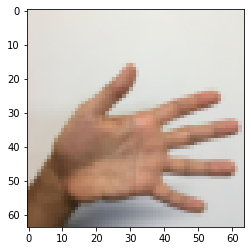

In [64]:
import matplotlib.pyplot as plt

index = 0
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[:, index])))

In [65]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

X_train = X_train / 255
X_test = X_test / 255

Y_train = onehot(Y_train, 6)
Y_test = onehot(Y_test, 6)

In [66]:
def create_placeholders(n_x, n_y):
    X = tf1.placeholder(tf1.float32, shape=(n_x, None))
    Y = tf1.placeholder(tf1.float32, shape=(n_y, None))
    
    return X, Y

In [67]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_3:0", shape=(6, ?), dtype=float32)


In [68]:
def init_params():
    tf1.set_random_seed(1)
    
    W1 = tf1.get_variable("W1", [25, 12288], initializer=tf2.initializers.GlorotUniform(seed=1))
    b1 = tf1.get_variable("b1", [25, 1], initializer=tf1.zeros_initializer())
    W2 = tf1.get_variable("W2", [12, 25], initializer=tf2.initializers.GlorotUniform(seed=1))
    b2 = tf1.get_variable("b2", [12, 1], initializer=tf1.zeros_initializer())
    W3 = tf1.get_variable("W3", [6, 12], initializer=tf2.initializers.GlorotUniform(seed=1))
    b3 = tf1.get_variable("b3", [6, 1], initializer=tf1.zeros_initializer())
    
    params = {
        "W1":W1, "b1":b1,
        "W2":W2, "b2":b2,
        "W3":W3, "b3":b3
    }
    
    return params

In [69]:
tf1.reset_default_graph()
with tf1.Session() as sess:
    parameters = init_params()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [70]:
def forward_propagation(X, params):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    Z1 = tf1.add(tf1.matmul(W1, X), b1)
    A1 = tf1.nn.relu(Z1)
    Z2 = tf1.add(tf1.matmul(W2, A1), b2)
    A2 = tf1.nn.relu(Z2)
    Z3 = tf1.add(tf1.matmul(W3, A2), b3)
    A3 = tf1.nn.relu(Z3)
    
    return Z3

In [71]:
tf1.reset_default_graph()

with tf1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = init_params()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [72]:
def compute_cost(Z3, Y):
    logits = tf1.transpose(Z3)
    labels = tf1.transpose(Y)
    
    cost = tf1.reduce_mean(tf1.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
    return cost

In [73]:
tf1.reset_default_graph()

with tf1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    params = init_params()
    Z3 = forward_propagation(X, params)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


## Building model

In [74]:
from tensorflow.python.framework import ops

In [87]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001,
         num_epochs=1500, minibatch_size=32, print_cost=True):
    
    ops.reset_default_graph() 
    tf1.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X, Y = create_placeholders(n_x, n_y)
    
    params = init_params()
    Z3 = forward_propagation(X, params)
    cost = compute_cost(Z3, Y)
    optimizer = tf1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf1.global_variables_initializer()
    
    with tf1.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed = seed+1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={
                    X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost / minibatch_size
            if print_cost and epoch % 100 == 0:
                print("Cost after iteration {}: {}".format(epoch, epoch_cost))
            if print_cost and epoch % 5 == 0:
                costs.append(epoch_cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel("cost")
        plt.title("Learning rate = {}".format(learning_rate))
        plt.show()
        
        params = sess.run(params)
        
        correct_prediction = tf1.equal(tf1.argmax(Z3), tf1.argmax(Y))
        accuracy = tf1.reduce_mean(tf1.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return params

Cost after iteration 0: 1.9248519353568554
Cost after iteration 100: 0.838108703494072
Cost after iteration 200: 0.5896600866690278
Cost after iteration 300: 0.4088600710965693
Cost after iteration 400: 0.2814394710585475
Cost after iteration 500: 0.19935512798838317
Cost after iteration 600: 0.12979985517449677
Cost after iteration 700: 0.0863782549276948
Cost after iteration 800: 0.05756790260784328
Cost after iteration 900: 0.03287718220963143
Cost after iteration 1000: 0.021990096094668843
Cost after iteration 1100: 0.012176379153970629
Cost after iteration 1200: 0.00912882570992224
Cost after iteration 1300: 0.005713369406294078
Cost after iteration 1400: 0.0038093659750302322


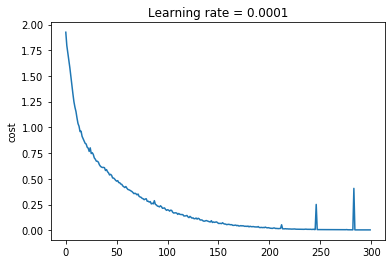

ValueError: Shape must be rank 0 but is rank 1 for '{{node ArgMax_1}} = ArgMax[T=DT_FLOAT, Tidx=DT_INT64, output_type=DT_INT64](Add_2, ArgMax)' with input shapes: [6,?], [?].

In [90]:
params = model(X_train, Y_train, X_test, Y_test)

In [89]:
def predict(X, params):
    W1 = tf1.convert_ti_tensor(params["W1"])
    b1 = tf1.convert_ti_tensor(params["b1"])    
    W2 = tf1.convert_ti_tensor(params["W2"])    
    b2 = tf1.convert_ti_tensor(params["b2"])    
    W3 = tf1.convert_ti_tensor(params["W3"])    
    b3 = tf1.convert_ti_tensor(params["b3"])    
    
    params = {"W1": W1, "b1": b1,
              "W2": W2, "b2": b2,
              "W3": W3, "b3": b3}
    
    x = tf1.placeholder("float", [12288, 1])
    
    z3 = forward_propagation(x, params)
    p = tf1.argmax(z3)
    
    sess = tf1.Session()
    prediction = sess.run(p, feed_dict={x:X})
    
    return prediction

In [ ]:
import scipy
from PIL import Image
from scipy import ndimage

img = "images/thumbs_up.jpg"
img = np.array(ndimage.imread(img, flatten=False))
img img / 255
my_img = scipy.misc.imresize(img, size=(64, 64)).reshape((1, 64*64*3)).T
my_img_pred = predict(my_img, params)

plt.imshow(img)
print(np.squeeze(my_img_prediction))